<a href="https://colab.research.google.com/github/HRKhan-DS/deep_learning_pytorch/blob/main/linear_logistic_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression with PyTorch

Epoch [10/100], Loss: 5.8303
Epoch [20/100], Loss: 4.0663
Epoch [30/100], Loss: 2.9109
Epoch [40/100], Loss: 2.1501
Epoch [50/100], Loss: 1.6469
Epoch [60/100], Loss: 1.3128
Epoch [70/100], Loss: 1.0902
Epoch [80/100], Loss: 0.9412
Epoch [90/100], Loss: 0.8410
Epoch [100/100], Loss: 0.7731

Test Loss: 0.7715
Training R² Score: 0.4257
Test R² Score: 0.4113


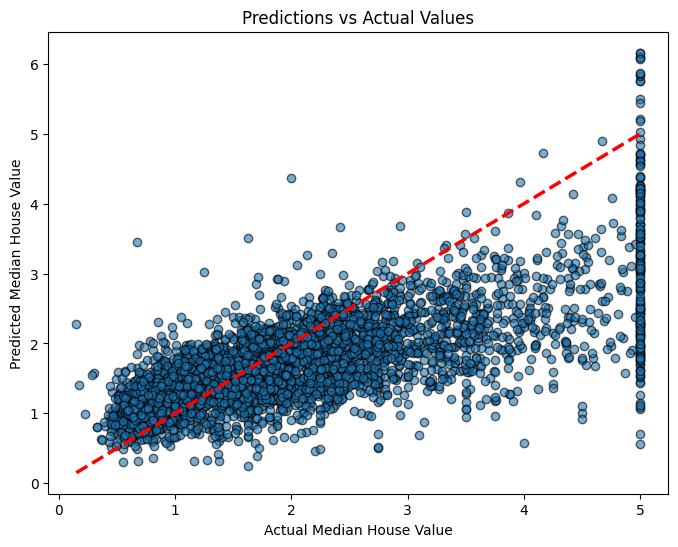

In [5]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# Load the California housing dataset
data = fetch_california_housing()
X = data.data  # Features
y = data.target.reshape(-1, 1)  # Target variable (median house value)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features for better model performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert the data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

# Define the Linear Regression model
class LinearRegression(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.linear = nn.Linear(input_dim, 1)  # Multiple features, one output

    def forward(self, x):
        return self.linear(x)

# Initialize the model
input_dim = X_train.shape[1]  # Number of features
model = LinearRegression(input_dim)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Training the model
num_epochs = 100
for epoch in range(num_epochs):
    model.train()

    # Forward pass
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)  # Compute loss

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# # Compute final test loss
model.eval()
with torch.no_grad():
    y_test_pred = model(X_test)
    test_loss = criterion(y_test_pred, y_test)
    print(f'\nTest Loss: {test_loss.item():.4f}')

# Evaluate the model on training and test data
model.eval()
with torch.no_grad():
    # Predictions
    y_train_pred = model(X_train)
    y_test_pred = model(X_test)

    # Convert to numpy arrays (handle CPU/GPU compatibility)
    y_train_pred = y_train_pred.cpu().numpy()
    y_test_pred = y_test_pred.cpu().numpy()
    y_train = y_train.cpu().numpy()
    y_test = y_test.cpu().numpy()

    # Compute R² scores
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    print(f'Training R² Score: {train_r2:.4f}')
    print(f'Test R² Score: {test_r2:.4f}')

# Plot predictions vs actual values for test data
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2.5)
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Predictions vs Actual Values')
plt.show()

LOgistic Regression with PyTorch

Epoch [10/100], Loss: 0.6437
Epoch [20/100], Loss: 0.5135
Epoch [30/100], Loss: 0.4361
Epoch [40/100], Loss: 0.3850
Epoch [50/100], Loss: 0.3486
Epoch [60/100], Loss: 0.3211
Epoch [70/100], Loss: 0.2995
Epoch [80/100], Loss: 0.2820
Epoch [90/100], Loss: 0.2676
Epoch [100/100], Loss: 0.2553
Training Accuracy: 0.9495
Test Accuracy: 0.9649
Confusion Matrix:
[[40  3]
 [ 1 70]]


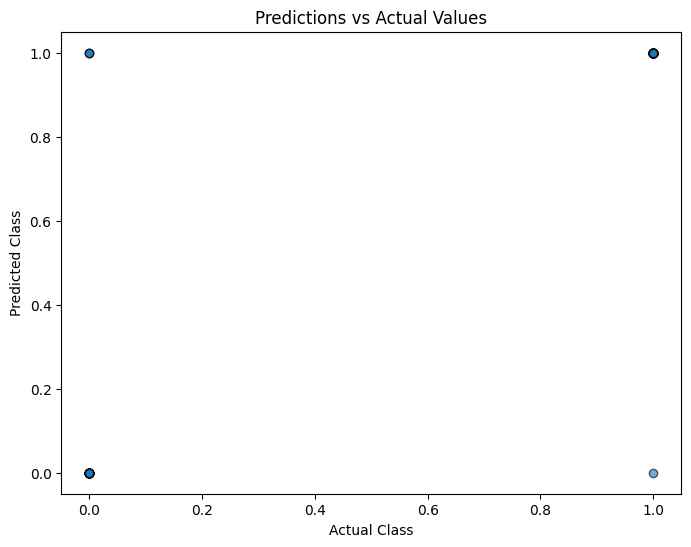

In [12]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the Breast Cancer dataset
data = datasets.load_breast_cancer()
X = data.data  # Features
y = data.target.reshape(-1, 1)  # Target variable (binary: 0 or 1)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features for better model performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert the data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

# Define the Logistic Regression model
class LogisticRegression(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.linear = nn.Linear(input_dim, 1)  # One output for binary classification

    def forward(self, x):
        return torch.sigmoid(self.linear(x))  # Sigmoid activation

# Initialize the model
input_dim = X_train.shape[1]  # Number of features
model = LogisticRegression(input_dim)

# Define loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Training the model
num_epochs = 100
for epoch in range(num_epochs):
    model.train()  # Set model to training mode

    # Forward pass
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)  # Compute loss

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model on training and test data
model.eval()  # Set model to evaluation mode
with torch.no_grad():
    # Predictions
    y_train_pred = model(X_train)
    y_test_pred = model(X_test)

    # Binarize predictions (threshold = 0.5)
    y_train_pred = (y_train_pred >= 0.5).float()
    y_test_pred = (y_test_pred >= 0.5).float()

    # Convert to numpy arrays for evaluation
    y_train_pred = y_train_pred.numpy()
    y_test_pred = y_test_pred.numpy()
    y_train = y_train.numpy()
    y_test = y_test.numpy()

    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    print(f'Training Accuracy: {train_accuracy:.4f}')
    print(f'Test Accuracy: {test_accuracy:.4f}')

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_test_pred)
    print(f'Confusion Matrix:\n{cm}')

# Plot predictions vs actual values for test data
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6, edgecolors='k')
plt.xlabel('Actual Class')
plt.ylabel('Predicted Class')
plt.title('Predictions vs Actual Values')
plt.show()